In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

import matplotlib.pyplot as plt

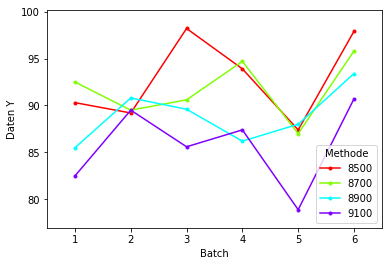

In [2]:
Daten = DataFrame({
    "Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
    "Methode": np.repeat(["8500", "8700", "8900", "9100"], 6),
    "Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 89.5, 90.6, 94.7, 87, 95.8,85.5, 90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 78.9, 90.7]) })

interaction_plot(x=Daten["Batch"], trace=Daten["Methode"], response=Daten["Y"])
plt.ylabel("Daten Y")
plt.show()

(Oben) - Das ist die Realität.

#### Schlussfolgerung (Interpretation):
     (Frage: Gibt es einen Signifikaten Unterschied?)

Ansatzweise gibt es einen Ansatz, dass es ein Unterschied gibt .. aber nicht klar

In [5]:
from patsy.contrasts import Sum
fit = ols("Y ~ C(Methode, Sum)+C(Batch,Sum)", data=Daten).fit()
fit.params

Intercept                  89.795833
C(Methode, Sum)[S.8500]     3.020833
C(Methode, Sum)[S.8700]     1.887500
C(Methode, Sum)[S.8900]    -0.879167
C(Batch, Sum)[S.1]         -2.095833
C(Batch, Sum)[S.2]         -0.045833
C(Batch, Sum)[S.3]          1.204167
C(Batch, Sum)[S.4]          0.754167
C(Batch, Sum)[S.5]         -4.470833
dtype: float64

$ (3.020833+.887500+-0.879167+x) = 0 $

$ x = -3.02917 $ 

In [10]:
fit = ols("Y ~ C(Methode, Sum)+C(Batch, Sum)", data=Daten).fit()
anova_lm(fit)

/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,8.107077,0.001916
"C(Batch, Sum)",5.0,192.252083,38.450417,5.248666,0.005532
Residual,15.0,109.886250,7.325750,NaN,NaN


In [12]:
fit = ols("Y ~ C(Methode, Sum)", data=Daten).fit()
anova_lm(fit)

/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,3.931339,0.023448
Residual,20.0,302.138333,15.106917,NaN,NaN


# Faktorielle Experimente mit zwei Faktoren

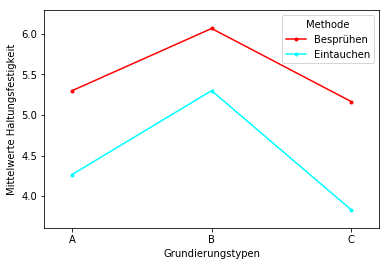

In [13]:
Farbe = DataFrame({
    "Grund": np.repeat(["A", "B", "C"], 6),
    "Methode": np.tile(np.repeat(["Eintauchen", "Besprühen"], 3), 3),
    "Y": np.array([4, 4.5, 4.3, 5.4, 4.9, 5.6, 5.6, 4.9, 5.4, 5.8, 6.1, 6.3, 3.8, 3.7, 4, 5.5, 5, 5])
})

interaction_plot(x=Farbe["Grund"], trace=Farbe["Methode"], response=Farbe["Y"])

plt.xlabel("Grundierungstypen")
plt.ylabel("Mittelwerte Haltungsfestigkeit")
plt.show()


## Elritzen

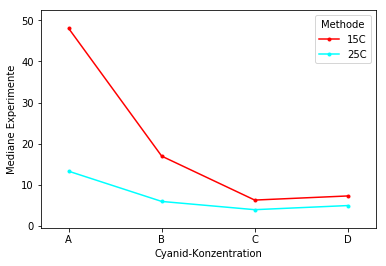

In [17]:
El = DataFrame({
    "Konz": np.repeat(["A", "B", "C","D"], 6),
    "Temp": np.tile(np.repeat(["15C", "25C"],3),4),
    "Y": np.array([82, 46, 16, 20, 13, 7, 20, 14, 17, 6, 7, 5, 8, 6, 5, 4, 3, 5, 10, 7, 5, 6, 4, 5])
})

interaction_plot(x=El["Konz"], trace=El["Temp"], response=El["Y"], legendtitle="Methode")

plt.xlabel("Cyanid-Konzentration")
plt.ylabel("Mediane Experimente")

plt.show()

In [21]:
fit = ols("Y~C(Konz,Sum)*C(Temp,Sum)",data=El).fit()
fit.params

Intercept                                13.375000
C(Konz, Sum)[S.A]                        17.291667
C(Konz, Sum)[S.B]                        -1.875000
C(Konz, Sum)[S.C]                        -8.208333
C(Temp, Sum)[S.15C]                       6.291667
C(Konz, Sum)[S.A]:C(Temp, Sum)[S.15C]    11.041667
C(Konz, Sum)[S.B]:C(Temp, Sum)[S.15C]    -0.791667
C(Konz, Sum)[S.C]:C(Temp, Sum)[S.15C]    -5.125000
dtype: float64

In [22]:
anova_lm(fit)

/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/tluscre1/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
"C(Konz, Sum)",3.0,2531.125000,843.708333,5.843867,0.006803
"C(Temp, Sum)",1.0,950.041667,950.041667,6.580375,0.020754
"C(Konz, Sum):C(Temp, Sum)",3.0,1050.458333,350.152778,2.425301,0.103439
Residual,16.0,2310.000000,144.375000,NaN,NaN
